In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

Refer to the [integrations documentation](https://ajkdrag.github.io/ocrtoolkit/ocrtoolkit/integrations/index.html) to see how `ocrtoolkit` calls inference code of different frameworks such as `DocTR` and `PaddleOCR`

## imports

The prefix `DOCTR` is for `DocTR` while `PPOCR` is for `PaddleOCR`
Make sure that you installed the necessary extra dependencies
i.e. using:
```
pip install ocrtoolkit[doctr,paddle]
```

In [3]:
from ocrtoolkit.models import PPOCR_SVTR_LCNET, DOCTR_FAST_TINY

In [4]:
from ocrtoolkit.core import detect, recognize
from ocrtoolkit.datasets import FileDS

/home/ajkdrag/workspace/ocrtoolkit/src/ocrtoolkit/utilities/io_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## loading models

We can mix and match different frameworks. E.g. Using `DocTR` text detection with `PaddleOCR` text recognition

In [5]:
model_kwargs = {
    "symmetric_pad": True,
    "preserve_aspect_ratio": True
}

text_detection_model = DOCTR_FAST_TINY(path="/home/ajkdrag/.cache/doctr/models/fast_tiny-7bee86e2.pt",
                                       **model_kwargs)

2024-03-18 11:16:07.849 | INFO     | ocrtoolkit.wrappers.model:__init__:22 - Loaded model from /home/ajkdrag/.cache/doctr/models/fast_tiny-7bee86e2.pt, to cpu


In [6]:
recognition_model = PPOCR_SVTR_LCNET()

2024-03-18 11:16:21.157 | INFO     | ocrtoolkit.utilities.network_utils:download_file:86 - Found /home/ajkdrag/.cache/ppocr/models/en_PP-OCRv4_rec_infer.tar. Skipping download.
2024-03-18 11:16:21.158 | INFO     | ocrtoolkit.utilities.network_utils:download_file:107 - Found /home/ajkdrag/.cache/ppocr/models/en_PP-OCRv4_rec_infer. Skipping untar.
2024-03-18 11:16:21.162 | INFO     | ocrtoolkit.integrations.paddleocr:load:112 - Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir=None, cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir=None, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast

## loading few images for inference

In [7]:
mini_ds = FileDS("../data/public/images/").sample()

  0%|          | 0/237 [00:00<?, ?it/s]

2024-03-18 11:16:42.552 | INFO     | ocrtoolkit.utilities.io_utils:get_files:57 - Found 235 files.


In [8]:
len(mini_ds)

5

## running inference

In [9]:
text_det_results = detect(text_detection_model, mini_ds, stream=False, verbose=False)

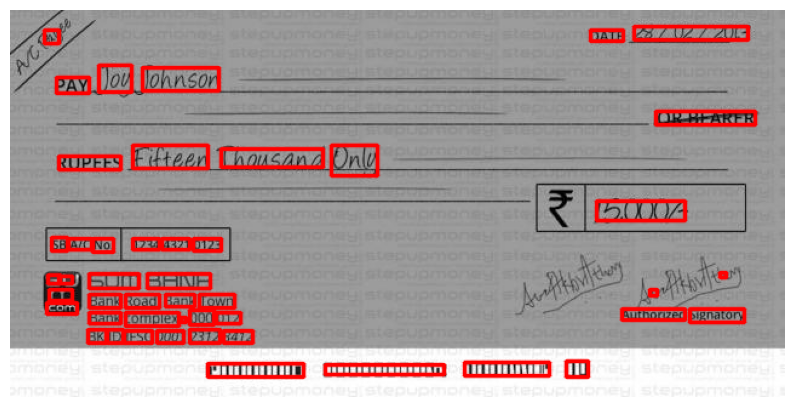

In [10]:
text_det_results[0].draw(mini_ds)

In [11]:
list_text_det_ds = [det_result.create_ds(mini_ds) for det_result in text_det_results]

In [12]:
recognition_results = [recognize(recognition_model, ds, verbose=False, stream=False)
                       for ds in list_text_det_ds]

In [13]:
first_image_results = recognition_results[0]
first_image_ds = list_text_det_ds[0]

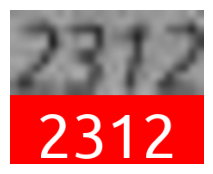

In [20]:
first_image_results[5].draw(first_image_ds)

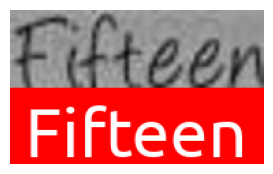

In [23]:
first_image_results[39].draw(first_image_ds)